In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install git+https://github.com/syngokhan/NLP_Preprocess.git

  Cloning https://github.com/syngokhan/NLP_Preprocess.git to /tmp/pip-req-build-wxhqc8xd
  Running command git clone -q https://github.com/syngokhan/NLP_Preprocess.git /tmp/pip-req-build-wxhqc8xd


In [3]:
import Preprocess_gokhanEr as pp

In [4]:
path = "https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv"

df = pd.read_csv(path)
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
print("Tweet Shape : {}".format(df.shape))

Tweet Shape : (7613, 5)


In [6]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

# Exploratory Data Analysis

In [7]:
df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


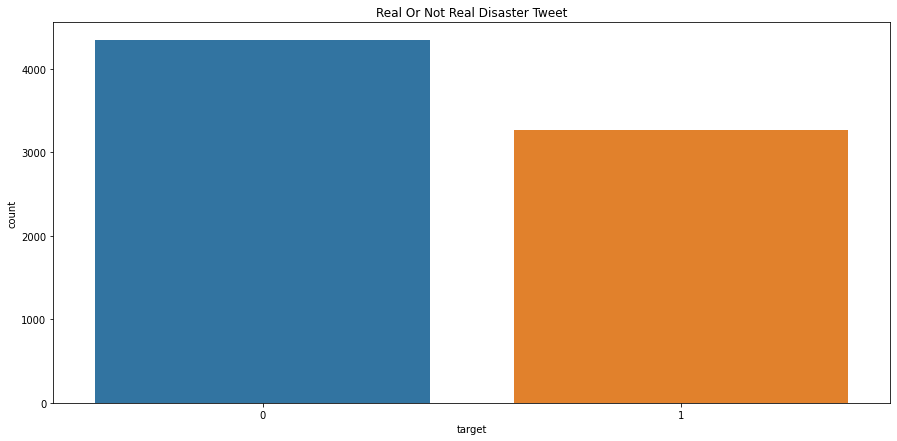

In [8]:
# Target Distribution

plt.figure(figsize = (15,7))
plt.title("Real Or Not Real Disaster Tweet")
sns.countplot(df["target"])
plt.show()

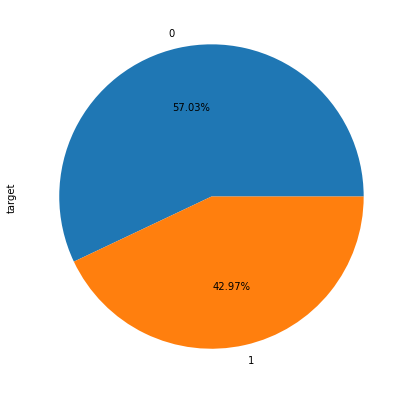

In [9]:
plt.figure(figsize = (15,7))
df["target"].value_counts().plot.pie(autopct = "%.2f%%")
plt.show()

In [10]:
df = pp.get_basic_features(dataframe = df,col_name = "text")
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,10
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,5
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,2
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


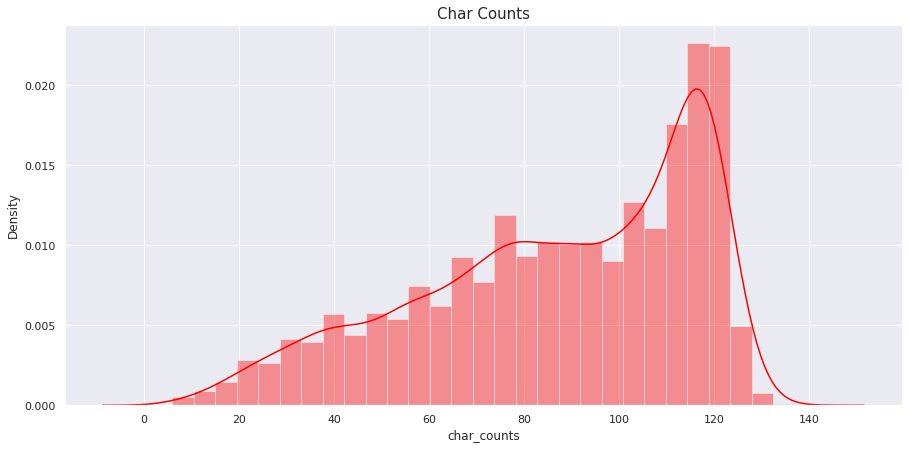

In [11]:
sns.set()
plt.figure(figsize= (15,7))
sns.distplot(df["char_counts"], kde = True, color = "red")
plt.title("Char Counts" , fontsize =15)
plt.show()

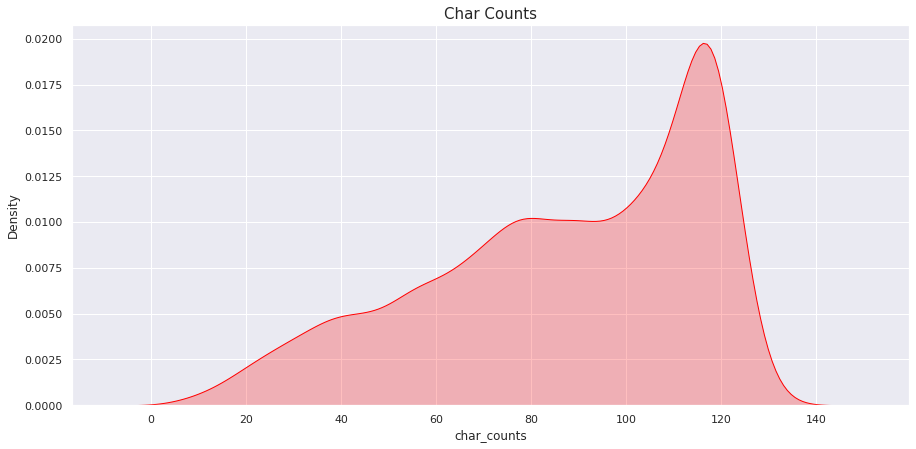

In [12]:
sns.set()
plt.figure(figsize= (15,7))
sns.kdeplot(df["char_counts"],shade=True, color = "red")
plt.title("Char Counts" , fontsize =15)
plt.show()

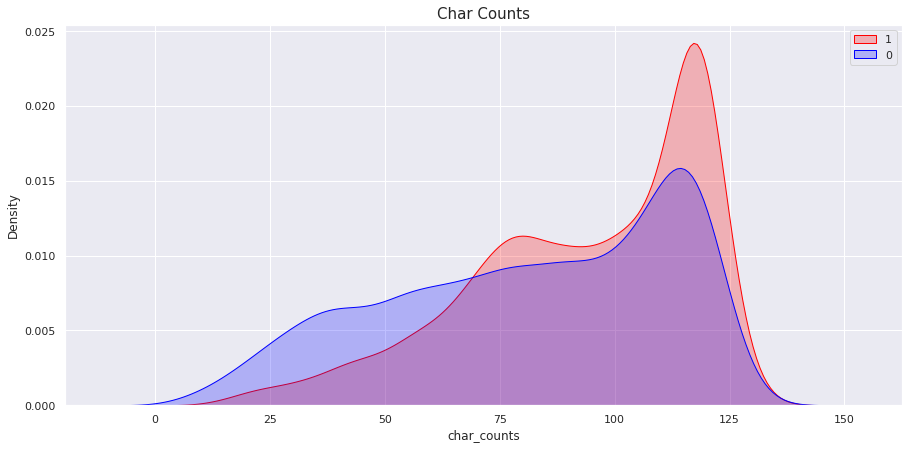

In [13]:
sns.set()
plt.figure(figsize= (15,7))

sns.kdeplot(df[df["target"] == 1]["char_counts"] ,shade=True, color = "red",label = "1")
sns.kdeplot(df[df["target"] == 0]["char_counts"] ,shade=True, color = "blue", label = "0")
plt.legend(loc = "best")
plt.title("Char Counts" , fontsize =15)
plt.show()

<Figure size 1080x504 with 0 Axes>

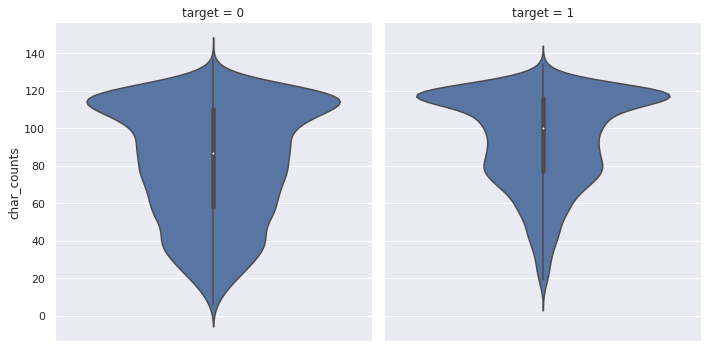

In [14]:
plt.figure(figsize = (15,7))
sns.catplot(y = "char_counts", data = df , kind = "violin", col = "target")
plt.show()

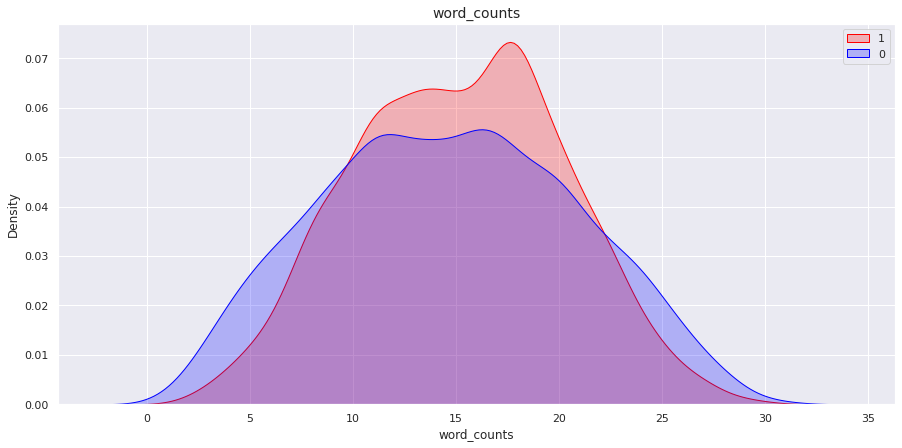

In [15]:
plt.figure(figsize = (15,7))

sns.kdeplot(df[df["target"] == 1]["word_counts"], shade = True, color="red",label = "1")
sns.kdeplot(df[df["target"] == 0]["word_counts"], shade = True, color="blue",label = "0")
plt.legend(loc = "best")
plt.title("word_counts", fontsize = 14)
plt.show()

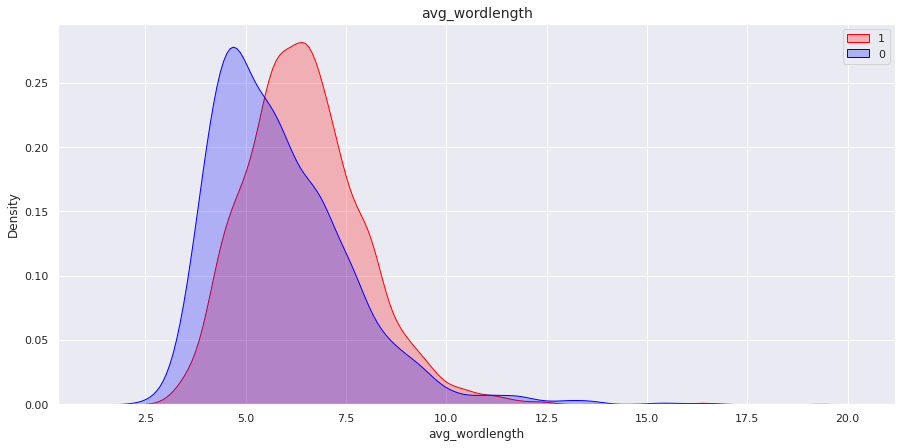

In [16]:
plt.figure(figsize = (15,7))

sns.kdeplot(df[df["target"] == 1]["avg_wordlength"], shade = True, color="red",label = "1")
sns.kdeplot(df[df["target"] == 0]["avg_wordlength"], shade = True, color="blue", label = "0")
plt.legend(loc = "best")
plt.title("avg_wordlength", fontsize = 14)
plt.show()

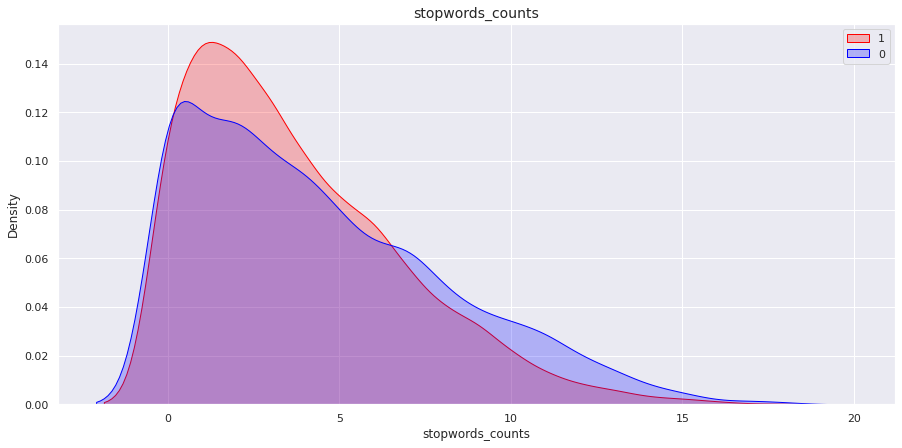

In [17]:
plt.figure(figsize = (15,7))

sns.kdeplot(df[df["target"] == 1]["stopwords_counts"], shade = True, color="red",label = "1")
sns.kdeplot(df[df["target"] == 0]["stopwords_counts"], shade = True, color="blue", label = "0")
plt.legend(loc = "best")
plt.title("stopwords_counts", fontsize = 14)
plt.show()

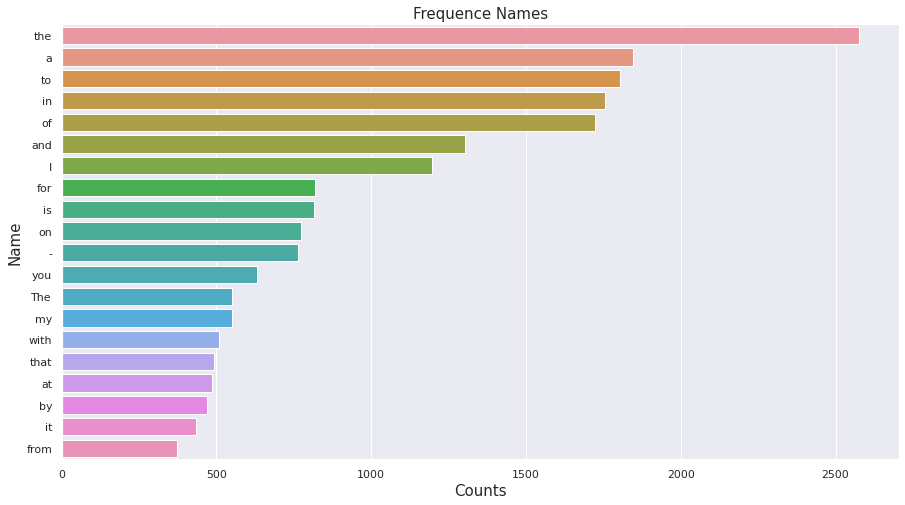

In [18]:
counts = pp.get_value_counts(df , "text", n = 20, plot = True)

In [19]:
counts.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16402,16401,16400,16399,16398,16397,16396,16395,16394,16393,16392,16391,16390,16389,16388,16387,16386,16405,16406,16407,16418,16426,16425,16424,16423,16422,16421,16420,16419,16417,16408,16416,16415,16414,16413,16412,16411,16410,16409,31923
Name,the,a,to,in,of,and,I,for,is,on,-,you,The,my,with,that,at,by,it,from,be,was,have,are,this,like,&amp;,A,as,just,your,up,but,me,so,not,has,out,I'm,??,...,Sandy,spit,Huebel's,Ohio?,#perspective,http://t.co/cxB55H37jn,fight!!,ZrNf,@cityofhummus,http://t.co/OamqqBNIce,#disasterrecovery,Hindustan,http://t.co/MET0mtpr3S,Aladdin,halfway,storm..like,Reveals,resting,#HHBU,http://t.co/zzsEe5Hipm,putin,Cebu,Taipei,vÌ_deo,Scarlet,predictions,THOUGHT,http://t.co/5ytIeX55lh,legendary,organizations.,tomorrow!,ready:,@itss_selenaluna,Ranking,hit-and-run,frustrated,@WaynesterAtl,staining,collide:,DURANT
Counts,2575,1845,1805,1757,1722,1302,1197,820,814,773,763,632,552,549,508,492,485,469,433,372,371,363,353,345,335,318,295,290,282,258,254,250,250,244,239,236,229,226,225,214,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# One - Shot Data Cleaning

In [20]:
def get_clean(words):

    words = pp.get_lower_convert(words)
    words = words.replace("//"," ").replace("_"," ").replace("."," ")
    words = pp.cont_exp(words)
    words = pp.remove_emails(words)
    words = pp.remove_urls(words)
    words = pp.remove_html_tags(words)
    words = pp.remove_rt(words)
    words = pp.remove_accented_chars(words)
    words = pp.remove_special_chars(words)
    words = pp.remove_dups_char(words)

    return words

In [21]:
df["text"] = df["text"].apply(lambda words : get_clean(words))
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,10
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,5
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,2
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,3


# Disaster Words Visualization With Word Cloud

In [22]:
from wordcloud import WordCloud

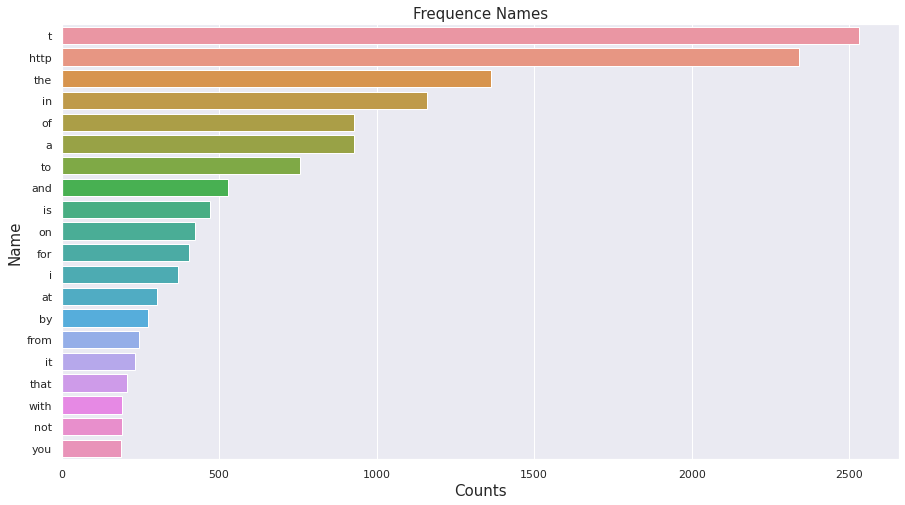

In [23]:
real_counts = pp.get_value_counts(df[df["target"] == 1], col_name = "text", plot = True, n = 20)

In [24]:
real_counts.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6400,6399,6398,6397,6396,6395,6394,6422,6424,6454,6440,6453,6452,6451,6450,6449,6448,6447,6446,6445,6444,6443,6442,6441,6439,6425,6438,6437,6436,6435,6434,6433,6432,6431,6430,6429,6428,6427,6426,11974
Name,t,http,the,in,of,a,to,and,is,on,for,i,at,by,from,it,that,with,not,you,after,this,fire,was,are,as,have,my,news,https,over,up,more,via,an,disaster,were,be,people,california,...,fashionable,513,cofdzzumyw8i,co6otfp31lqw,employed,snacks,com0utldif77,coezbtg81trz,redcliffe,persist,weaponyou,akh,glaucoma,evahanderek,mindhttp,switzerland,springer,zehrs,coreoz7h3em8,1970,coirpssresrq,fide,fco,corp,cobb7ttdvjwe,withstand,breakingnewslh,515p,cocmsgexm4fc,couples,corvkyj3yuvk,pirates,coow4gexynbh,cov6nylvdped,co6aimd1uway,pregnant,tricky,youngu,kidscompany,appeared
Counts,2530,2339,1363,1161,928,927,757,529,471,425,403,368,304,275,246,232,209,192,191,190,188,180,179,174,174,169,154,149,134,133,127,126,122,121,119,119,118,115,113,111,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [25]:
real = " ".join(real_counts["Name"])
len(real)

108467

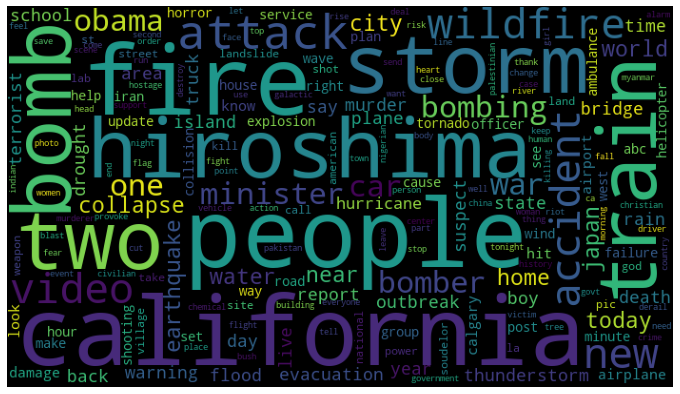

In [26]:
word_cloud = WordCloud(width = 700, height=400 ,max_font_size=100).generate(real)

plt.figure(figsize = (15,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

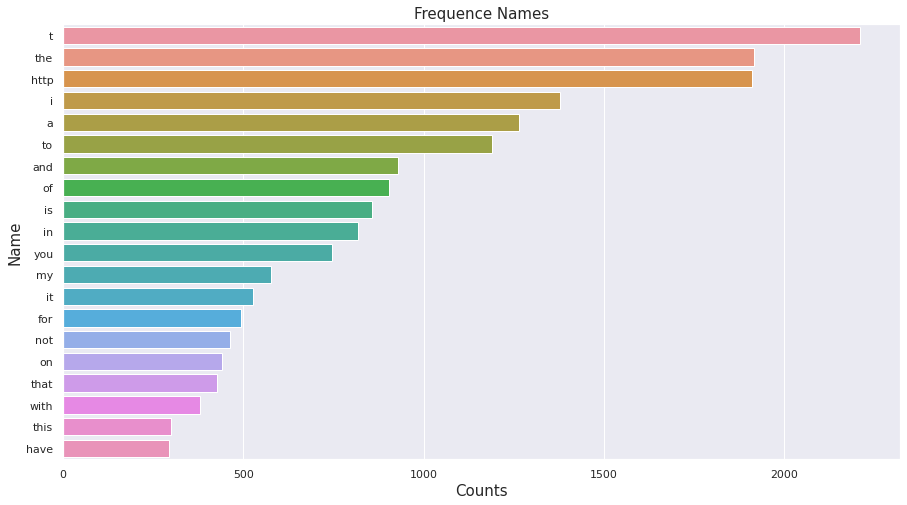

In [27]:
nreal_counts = pp.get_value_counts(df[df["target"] == 0], col_name = "text", plot = True, n = 20)

In [28]:
nreal_counts.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7803,7841,7832,7825,7826,7827,7828,7829,7830,7831,7833,7823,7834,7835,7836,7837,7838,7839,7840,7824,7822,7804,7812,7805,7806,7807,7808,7809,7810,7811,7813,7821,7814,7815,7816,7817,7818,7819,7820,14714
Name,t,the,http,i,a,to,and,of,is,in,you,my,it,for,not,on,that,with,this,have,be,am,https,are,do,me,out,your,like,so,by,at,just,was,but,will,up,all,he,if,...,haram,kenosha,corgpem2tqej,minor,cojmkywhv7mp,subtle,wbigbaldhead,littledeath,fond,luhan,kamunt,brzjc,patronultimalucha,curse,cydia,sensitive,marginoferror,nazis,limits,discount,embraced,grille,nextu,coczqr3ci9xw,co7pqs4rshhb,vibrator,donzilla,thrusts,fanged,30pcs,supply,1211,hubris,bento,blending,sonyprousa,susanj357,coumzkc9azwd,8437150124,coiwcu3dgi1a
Counts,2210,1915,1910,1379,1264,1189,930,904,857,819,746,578,527,495,463,442,428,380,299,294,290,266,265,261,259,257,256,253,252,247,245,237,229,225,219,215,195,185,184,182,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [29]:
nreal = " ".join(nreal_counts["Name"])
len(nreal)

130237

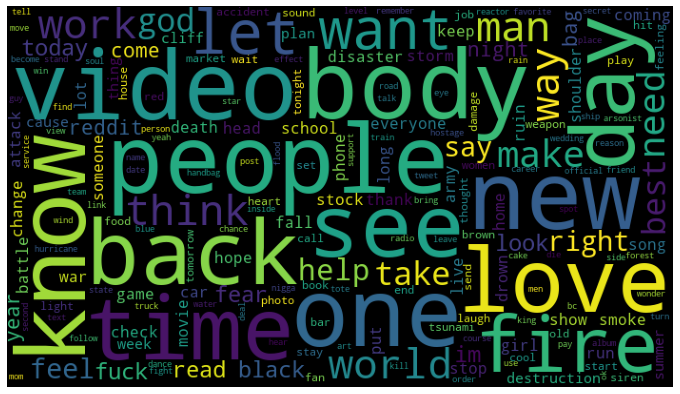

In [30]:
word_cloud = WordCloud(width = 700, height=400 ,max_font_size=100).generate(nreal)

plt.figure(figsize = (15,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Classification With TFIDF And SVM

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [32]:
text = df["text"]
y = df["target"]

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

print("X Shape : {}".format(X.shape))
print("Y Shape : {}".format(y.shape))

X Shape : (7613, 22545)
Y Shape : (7613,)


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X ,y ,test_size = 0.2, random_state = 0, stratify = y)

In [34]:
X_train.shape, X_test.shape

((6090, 22545), (1523, 22545))

In [35]:
def run_svm(clf,X_train, X_test, y_train, y_test):

    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    print()
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    return clf

In [36]:
clf = run_svm(LinearSVC(),X_train,X_test,y_train,y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.83      0.69      0.75       654

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



In [37]:
x = 'government has recently started registration for covid-19 vaccine'
x = get_clean(x)

print(x, clf.predict(tfidf.transform([x])))

government has recently started registration for covid19 vaccine [0]


# Classification With Word2Vec and SVM

In [38]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [39]:
import spacy
import en_core_web_lg

In [40]:
words = "cat dog"
nlp = en_core_web_lg.load()
def get_vec(words):

    #nlp = en_core_web_lg.load()
    vec = nlp(words).vector

    return vec

In [41]:
get_vec(words).shape

(300,)

In [42]:
df["Vec"] = df["text"].apply(lambda words : get_vec(words))
df[["Vec","text","target"]].head()

,Vec,text,target
0,"[-0.26623327, 0.05843069, -0.1404636, -0.05265...",our deeds are the reason of this earthquake ma...,1
1,"[-0.014817425, -0.09212343, -0.10716944, -0.33...",forest fire near la ronge sask canada,1
2,"[0.0059339865, 0.016337818, -0.105279535, -0.0...",all residents asked to shelter in place are be...,1
3,"[-0.13400537, 0.25267026, 0.09032763, -0.16645...",130 people receive wildfires evacuation orders...,1
4,"[-0.06394094, -0.01423019, 0.0063574947, 0.071...",just got sent this photo from ruby alaska as s...,1


In [43]:
X = []

for i in df["Vec"].values:

    X.append(i)

X = np.array(X)
y = df["target"]
X.shape, y.shape

((7613, 300), (7613,))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

clf_word2vec = run_svm(LinearSVC(), X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       869
           1       0.81      0.71      0.76       654

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



In [45]:
clf_word2vec.predict(get_vec("i love you").reshape(1,-1))

array([0])

# Word Embedding And Classification With Deep Learning

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding,Dropout,Conv1D,MaxPooling1D,GlobalMaxPool1D

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [47]:
text = df["text"]
text

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       130 people receive wildfires evacuation orders...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria ahrary thetawniest the out of control wil...
7610    m1 94 0104 coordinated universal time5km s of ...
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object

In [48]:
token = Tokenizer()
token.fit_on_texts(text)

In [49]:
token.word_counts

OrderedDict([('our', 100),
             ('deeds', 2),
             ('are', 435),
             ('the', 3278),
             ('reason', 19),
             ('of', 1832),
             ('this', 479),
             ('earthquake', 50),
             ('may', 88),
             ('allah', 8),
             ('forgive', 2),
             ('us', 143),
             ('all', 257),
             ('forest', 66),
             ('fire', 250),
             ('near', 54),
             ('la', 22),
             ('ronge', 1),
             ('sask', 1),
             ('canada', 11),
             ('residents', 8),
             ('asked', 10),
             ('to', 1946),
             ('shelter', 6),
             ('in', 1980),
             ('place', 26),
             ('being', 90),
             ('notified', 1),
             ('by', 520),
             ('officers', 8),
             ('no', 256),
             ('other', 35),
             ('evacuation', 49),
             ('or', 201),
             ('orders', 11),
             ('expecte

In [50]:
token.word_index

{'t': 1,
 'http': 2,
 'the': 3,
 'a': 4,
 'in': 5,
 'to': 6,
 'of': 7,
 'i': 8,
 'and': 9,
 'is': 10,
 'you': 11,
 'for': 12,
 'on': 13,
 'it': 14,
 'my': 15,
 'not': 16,
 'that': 17,
 'with': 18,
 'at': 19,
 'by': 20,
 'this': 21,
 'have': 22,
 'are': 23,
 'from': 24,
 'be': 25,
 'was': 26,
 'https': 27,
 'do': 28,
 'like': 29,
 'as': 30,
 'out': 31,
 'am': 32,
 'so': 33,
 'your': 34,
 'up': 35,
 'me': 36,
 'just': 37,
 'but': 38,
 'will': 39,
 'after': 40,
 'has': 41,
 'all': 42,
 'no': 43,
 'fire': 44,
 'an': 45,
 'when': 46,
 'if': 47,
 'he': 48,
 'new': 49,
 'we': 50,
 'get': 51,
 'they': 52,
 'now': 53,
 'about': 54,
 'via': 55,
 'more': 56,
 'people': 57,
 'what': 58,
 'or': 59,
 'how': 60,
 'one': 61,
 'been': 62,
 'there': 63,
 '2': 64,
 'over': 65,
 'news': 66,
 'would': 67,
 'who': 68,
 'into': 69,
 'were': 70,
 'video': 71,
 'can': 72,
 'emergency': 73,
 'disaster': 74,
 'us': 75,
 'police': 76,
 'than': 77,
 'off': 78,
 'her': 79,
 'some': 80,
 'still': 81,
 'his': 82,
 'b

In [51]:
# Keras Dökümanı söylüyor !!!

vocab_size = len(token.word_counts) + 1
vocab_size,len(token.word_index),len(token.word_counts)

(22581, 22580, 22580)

In [52]:
encoded_text = token.texts_to_sequences(text)
encoded_text[:5]

[[110, 4492, 23, 3, 868, 7, 21, 248, 130, 1681, 4493, 75, 42],
 [187, 44, 224, 764, 6793, 6794, 1328],
 [42,
  1682,
  1434,
  6,
  2062,
  5,
  656,
  23,
  126,
  6795,
  20,
  1683,
  43,
  439,
  254,
  59,
  2062,
  5,
  656,
  1329,
  23,
  1054],
 [2809, 57, 4494, 1330, 254, 1329, 5, 87],
 [37, 94, 1159, 21, 315, 24, 6796, 2063, 30, 262, 24, 1330, 6797, 69, 4, 190]]

In [53]:
length = []

for i in encoded_text:
    length.append(len(i))
    
np.array(length).max()

35

In [54]:
max_length = 40

sequence = pad_sequences(sequences=encoded_text , maxlen = max_length, padding = "post")
sequence

array([[ 110, 4492,   23, ...,    0,    0,    0],
       [ 187,   44,  224, ...,    0,    0,    0],
       [  42, 1682, 1434, ...,    0,    0,    0],
       ...,
       [2709, 2295, 4484, ...,    0,    0,    0],
       [  76, 1092,   40, ...,    0,    0,    0],
       [   3,  207,   56, ...,    0,    0,    0]], dtype=int32)

In [55]:
X_train,X_test,y_train,y_test = train_test_split(sequence, y, test_size = 0.2, random_state = 0, stratify = y)

model = LinearSVC()
clf = run_svm(model,X_train,X_test,y_train,y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       869
           1       0.48      0.40      0.44       654

    accuracy                           0.56      1523
   macro avg       0.54      0.54      0.54      1523
weighted avg       0.55      0.56      0.55      1523



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [56]:
vocab_size

22581

In [57]:
vec_size = 100

model = Sequential()

model.add(Embedding(input_dim = vocab_size, output_dim = vec_size , input_length=max_length))

model.add(Conv1D(filters = 32 , kernel_size = 2, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(rate = 0.5))

model.add(Dense(units = 32 , activation = "relu"))
model.add(Dropout(rate = 0.5))

model.add(Dense(units = 16 , activation = "relu"))
model.add(GlobalMaxPool1D())

model.add(Dense(units = 1, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           2258100   
                                                                 
 conv1d (Conv1D)             (None, 39, 32)            6432      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 32)            0         
                                                                 
 dense (Dense)               (None, 19, 32)            1056      
                                                                 
 dropout_1 (Dropout)         (None, 19, 32)            0         
                                                        

In [58]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = 5, validation_data = (X_test,y_test))

Epoch 1/5
191/191 [==============================] - 7s 32ms/step - loss: 0.6644 - accuracy: 0.5816 - val_loss: 0.6162 - val_accuracy: 0.6934
Epoch 2/5
191/191 [==============================] - 6s 31ms/step - loss: 0.5376 - accuracy: 0.7489 - val_loss: 0.4827 - val_accuracy: 0.7965
Epoch 3/5
191/191 [==============================] - 6s 30ms/step - loss: 0.3714 - accuracy: 0.8516 - val_loss: 0.4663 - val_accuracy: 0.7978
Epoch 4/5
191/191 [==============================] - 6s 30ms/step - loss: 0.2449 - accuracy: 0.9013 - val_loss: 0.4767 - val_accuracy: 0.7951
Epoch 5/5
191/191 [==============================] - 6s 31ms/step - loss: 0.1438 - accuracy: 0.9499 - val_loss: 0.5234 - val_accuracy: 0.7741


In [59]:
def history_graph(history):

    size = 15
    length = len(history.history["accuracy"])

    plt.figure(figsize = (15,7))

    plt.subplot(1,2,1)
    
    plt.plot(history.history["accuracy"], label = "Train")
    plt.plot(history.history["val_accuracy"], label = "Test")


    plt.legend(loc = "best")
    plt.xlabel("Epochs",size = size)
    plt.ylabel("Accuracy Score" , size = size)
    plt.xticks(range(0,length+1))
    
    plt.subplot(1,2,2)

    plt.plot(history.history["loss"],label = "Train")
    plt.plot(history.history["val_loss"], label = "Test")

    plt.legend(loc = "best")
    plt.xlabel("Epochs",size = size)
    plt.ylabel("Accuracy Score" , size = size)
    plt.xticks(range(0,length+1))

    plt.suptitle("History Graph", size = size )
    plt.show()

In [60]:
def confusion_graph(y_true,y_pred):

    cm = confusion_matrix(y_true,y_pred)

    plt.figure(figsize = (15,7))
    sns.heatmap(cm , annot = True , cmap = "viridis",cbar = False, annot_kws={"size" : 15}, fmt = "d", linecolor="white",linewidths=0.5)
    
    size = 15
    plt.xlabel("Predicted",size = size)
    plt.ylabel("Actual", size = size)
    plt.title("Confusion Graph" , size = size)
    plt.show()
    

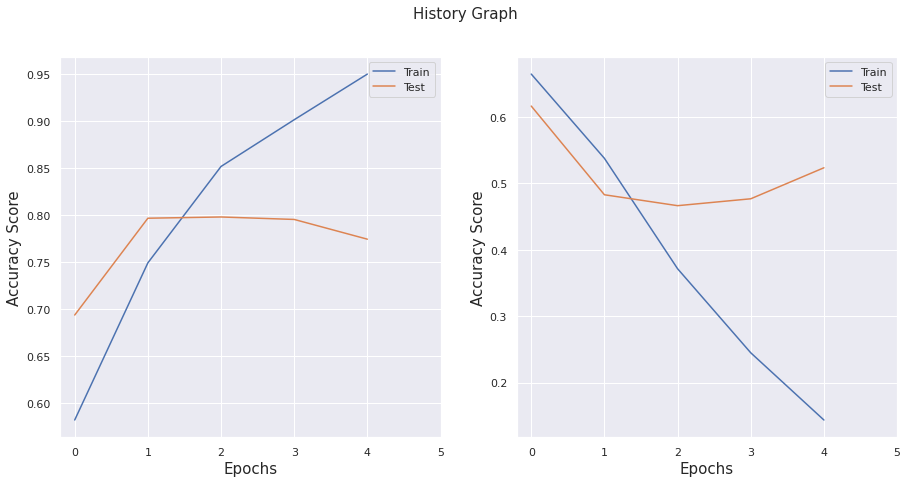

In [61]:
history_graph(history)

In [62]:
from sklearn.metrics import recall_score,precision_score,confusion_matrix

y_pred = model.predict(X_test)

for i in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:

    classes = [1 if val > i else 0 for val in y_pred]

    precision = np.round(precision_score(y_test, classes), 4)
    recall = np.round(recall_score(y_test , classes), 4)
    diff = np.round(np.abs(precision - recall), 4)

    print(f"Threshold : {i:{10}}, Precision : {precision:{10}}, Recall : {recall:{10}}, Diff : {diff} ")

Threshold :        0.2, Precision :     0.5983, Recall :     0.8517, Diff : 0.2534 
Threshold :        0.3, Precision :     0.6709, Recall :     0.8104, Diff : 0.1395 
Threshold :        0.4, Precision :     0.7101, Recall :     0.7492, Diff : 0.0391 
Threshold :        0.5, Precision :     0.7516, Recall :      0.708, Diff : 0.0436 
Threshold :        0.6, Precision :     0.7989, Recall :     0.6682, Diff : 0.1307 
Threshold :        0.7, Precision :     0.8313, Recall :     0.6177, Diff : 0.2136 
Threshold :        0.8, Precision :     0.8731, Recall :     0.5367, Diff : 0.3364 
Threshold :        0.9, Precision :     0.9218, Recall :     0.4327, Diff : 0.4891 


In [63]:
new_y_pred = [1 if i > 0.5 else 0 for i in y_pred]
print(classification_report(y_test,new_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       869
           1       0.75      0.71      0.73       654

    accuracy                           0.77      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.77      0.77      0.77      1523



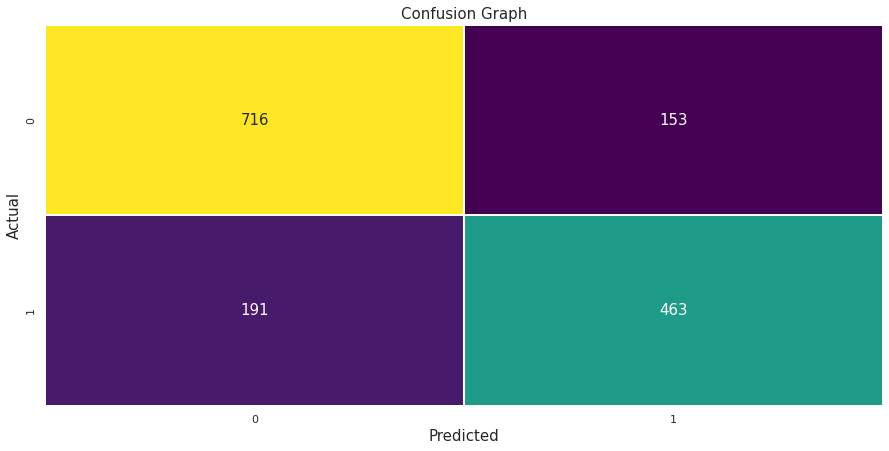

In [64]:
confusion_graph(y_test,new_y_pred)

In [65]:
def get_encoded(words):

    words = get_clean(words)

    encoded = token.texts_to_sequences([words])
    encoded = pad_sequences(encoded, maxlen = 40, padding = "post")

    return encoded

In [66]:
x = ["i am thrilledddd to see this"]
get_encoded(x)

array([[  8,  32,   6, 104,  21,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0]], dtype=int32)

In [67]:
model.predict(get_encoded(x))[0][0]

0.26153833